In [ ]:
from h5py import File

f = File('foo.h5', 'w')
f['data'] = np.ones((4, 3, 2), 'f')

In [4]:
list(f.keys())

['data']

In [8]:
list(f['data'].dims)
list(f['data'].dims[0])

[]

In [9]:
f['data'].dims[0].label = 'x'
f['data'].dims[1].label = 'y'
f['data'].dims[2].label = 'z'

f['data'][:]

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)

In [74]:
import numpy as np
# f['x'] = [0.1, 0.2, 0.3, 0.4]
f['y'] = [np.string_(el) for el in ['frank', 'phil', 'fogerty']]
# f['z'] = ['A', 'B']


f['data'].dims.create_scale(f['y'], 'man names')
# f['data'].dims.create_scale(f['z'], 'ab')

f['data'].dims[0].attach_scale(f['x'])
f['data'].dims[1].attach_scale(f['y'])
# f['data'].dims[2].attach_scale(f['z'])

RuntimeError: Unable to create link (name already exists)

In [55]:

f['data'].dims[2].attach_scale(f['z'])

In [49]:
d = f['data']
d.shape

(4, 3, 2)

In [50]:
d[0]

array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [66]:
d[2, 1, 1]
list(d.dims.keys())
d.dims[1]['man names'][0]

b'frank'

In [69]:
d[:, d.dims[1]['man names'] == 'frank']

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [75]:
f['data'].dims.create_scale(f['x'], 'x')

In [100]:
new = np.zeros((3, 2), 'f')
new[2, 0] = 0.22
new[2, 1] = 0.33

slc = d[d.dims[0]['x'][:] > 0.3, :]
print(d[:])

[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]


In [112]:
from util import ExperimentData

In [121]:
ed = ExperimentData.from_jsons('data/heatmap', 'heatmap.hdf')

In [122]:
ed.policies

['FPR', 'PUBLICATIONS', 'RANDOM']

In [123]:
ed.award_amounts

['10', '100', '40', '70']

In [124]:
ed.negres_rates

['0.10', '0.25', '0.75', '0.90']

In [125]:
ed.fpdrs

['0.10', '0.25', '0.75', '0.90']

In [126]:
del ed
ed = ExperimentData('heatmap.hdf')

In [127]:
print(ed.policies)
print(ed.award_amounts)
print(ed.negres_rates)
print(ed.fpdrs)

['FPR', 'PUBLICATIONS', 'RANDOM']
['10', '100', '40', '70']
['0.10', '0.25', '0.75', '0.90']
['0.10', '0.25', '0.75', '0.90']


In [157]:
from util import ExperimentData
hr = ExperimentData("data/heatmap-highres.hdf")

In [158]:
hr.hdf

<HDF5 file "heatmap-highres.hdf" (mode r)>

In [159]:
print(hr.policies)
print(hr.award_amounts)
print(hr.negres_rates)
print(hr.fpdrs)

['FPR', 'PUBLICATIONS', 'RANDOM']
['10', '100', '40', '70']
['0.00', '0.10', '0.20', '0.30', '0.40', '0.50', '0.60', '0.70', '0.80', '0.90', '1.00']
['0.00', '0.10', '0.20', '0.30', '0.40', '0.50', '0.60', '0.70', '0.80', '0.90', '1.00']


In [161]:
hr['FPR', '10', '0.10', '0.20']

<HDF5 group "/FPR/10/0.10/0.20" (3 members)>

In [165]:
hr['FPR']

<HDF5 group "/FPR" (4 members)>

In [181]:
this_fdr = hr['FPR', '10', '0.10', '0.20']['falseDiscoveryRate'][:]

print(this_fdr.shape)
print(this_fdr.mean(axis=0).shape)
print(np.isnan(this_fdr).sum())

(100, 500)
(500,)
1463


0


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


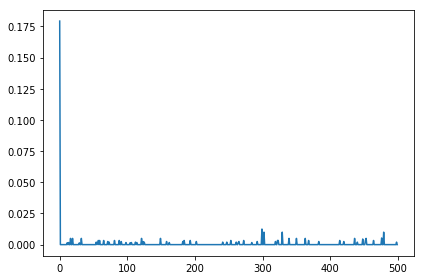

In [180]:
this_fdr[np.isnan(this_fdr)] = 0.0
m = this_fdr.mean(axis=0)
m[:100]

plt.plot(m)

In [185]:
this_grp = hr['FPR', '10', '0.10', '0.20']
this_pubs = this_grp['nPublications'][:]
print(this_pubs.shape)
print(this_pubs.sum())
print(this_pubs[this_pubs == 0].sum())

(100, 500)
115513.68000000002
0.0


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


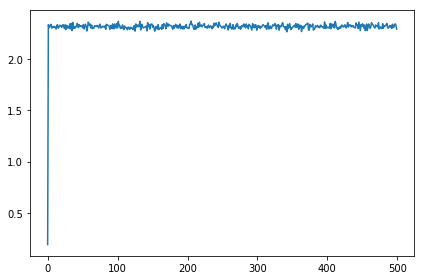

In [186]:
pubmean = this_pubs.mean(axis=0)
plt.plot(pubmean)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


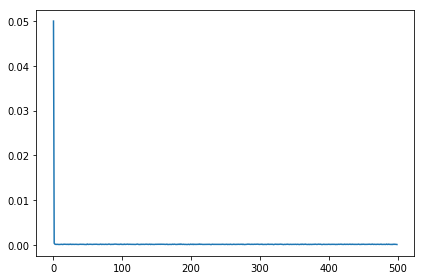

In [187]:
this_fpr = this_grp['falsePositiveRate'][:]
plt.plot(this_fpr.mean(axis=0))

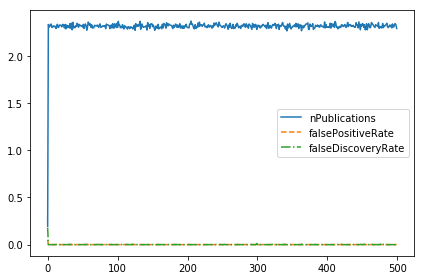

In [193]:
from vis import plot_means

plot_means(hr)